# Decision Tree in Machine Learning

## Overview
A **Decision Tree** is a supervised learning algorithm used for classification and regression tasks. It splits data into branches based on conditions, forming a tree-like structure for decision-making.

## Importing Libraries
```python
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
```

## Loading Dataset
```python
data = pd.read_csv('Renewable_Energy_Adoption.csv')
data.head()
```

### Sample Data
| carbon_emissions | energy_output | renewability_index | cost_efficiency | adoption |
|-----------------|--------------|-------------------|---------------|----------|
| 181.08         | 128.29       | 0.642            | 0.732         | 1        |
| 382.75         | 672.77       | 0.084            | 2.891         | 0        |

## Preprocessing
```python
X = data.drop(columns=['adoption'])
y = data['adoption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

## Model Training
```python
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)
```

## Predictions & Evaluation
```python
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
```

## Decision Tree Visualization
```python
plt.figure(figsize=(15,10))
plot_tree(model, feature_names=X.columns, class_names=['Not Adopted', 'Adopted'], filled=True)
plt.show()
```

## Conclusion
A Decision Tree helps in classifying data using a hierarchical structure. Tuning hyperparameters like `max_depth`, `min_samples_split`, and `criterion` can significantly impact performance.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [3]:
# Load the dataset
data = pd.read_csv('dataset/Renewable_Energy_Adoption.csv')
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,adoption
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [3]:
X = data[['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']]
y = data['adoption']  # Target variable

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialize the model with a specified max depth to prevent overfitting
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [6]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [7]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.85


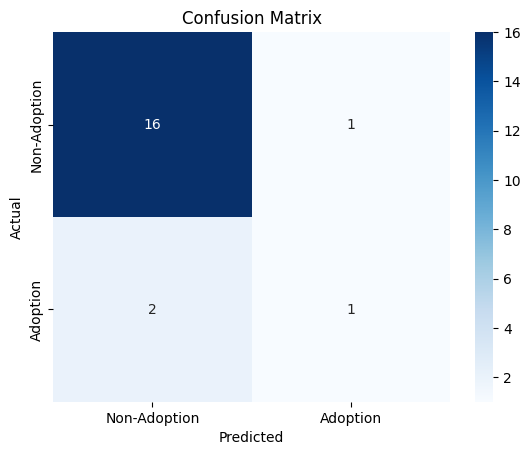

In [8]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Adoption', 'Adoption'], 
            yticklabels=['Non-Adoption', 'Adoption'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
print(classification_report(y_test, y_pred, target_names=['Non-Adoption', 'Adoption']))

              precision    recall  f1-score   support

Non-Adoption       0.89      0.94      0.91        17
    Adoption       0.50      0.33      0.40         3

    accuracy                           0.85        20
   macro avg       0.69      0.64      0.66        20
weighted avg       0.83      0.85      0.84        20



In [10]:
import joblib
joblib.dump(model,'Renewable_Energy_Adoption.pkl')

['Renewable_Energy_Adoption.pkl']

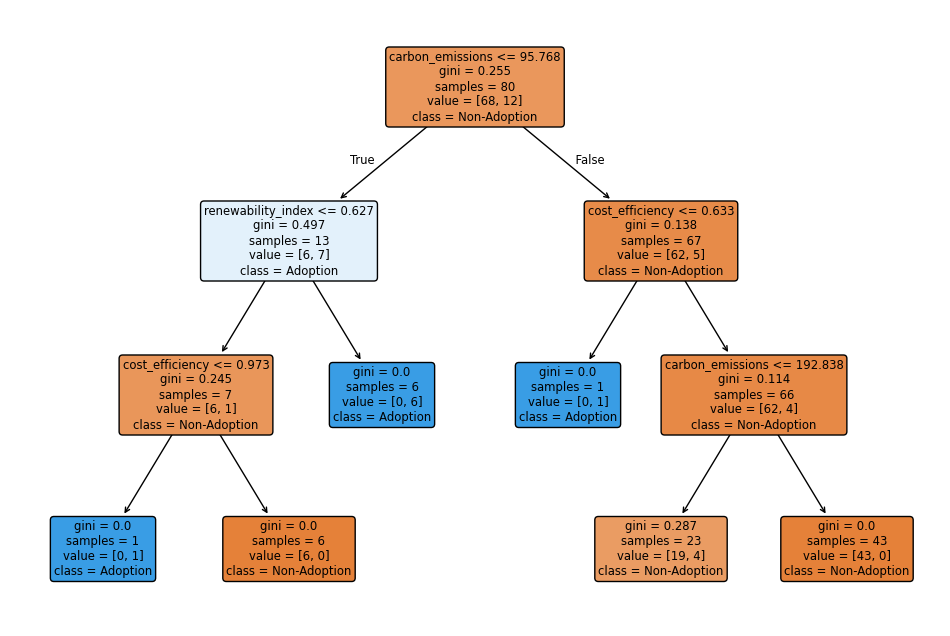

In [11]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['Non-Adoption', 'Adoption'], filled=True, rounded=True)
plt.savefig('dt1.png')
plt.show()